<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Евгений! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Обращаю внимание, что комментарии ревьюера после проверки удалять нельзя они помогают отследить логику исправления или изменения проекта. Это дополнительный навык при обучении. Свой исправляемый код лучше тоже не удалять, а ремить #, это позволит акцентировать изменения в ходе подготовки окончательного варианта проекта.<br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что получилось!</b></font>

___Статистический анализ данных сервиса GoFast___

Входные данные и задачи
    Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
без подписки:

абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra

абонентская плата —  199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

_Необходимо провести_:
- загрузку данных
- предобработку данных
- исследовательский анализ
- объединение данных
- подсчёт выручки
- проверку гипотез

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо сделано описание к проекту. 👍</font>

### Шаг 1. Загрузка данных

In [1]:
# Импорт необходимых библиотек
import math

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

##### Получение данных о пользователях

In [2]:
users_data = pd.read_csv('/datasets/users_go.csv')
users_data.info()
users_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


__данные полные, типы правильные__

##### Получение данных о поездках

In [3]:
rides_data = pd.read_csv('/datasets/rides_go.csv')
rides_data.info()
rides_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


__данные полные, типы правильные__

##### данные о тарифах

In [4]:
subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions_data.info()
subscriptions_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [5]:
subscriptions_data[subscriptions_data['subscription_type'] == 'free']['minute_price']

0    8
Name: minute_price, dtype: int64

__два типа подписок, согласно тз__

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, изучили данные для предобработки.</font>

### Шаг 2. Предобработка данных

In [6]:
# Преобразование столбца с датой в  формат pandas date
# добавление столбца с номером месяца
rides_data['date'] = pd.to_datetime(rides_data['date'])
rides_data['month'] = rides_data['date'].dt.month
rides_data['year'] = rides_data['date'].dt.year
rides_data.head()


,user_id,distance,duration,date,month,year
0,1,4409.919140,25.599769,2021-01-01,1,2021
1,1,2617.592153,15.816871,2021-01-18,1,2021
2,1,754.159807,6.232113,2021-04-20,4,2021
3,1,2694.783254,18.511000,2021-08-11,8,2021
4,1,4028.687306,26.265803,2021-08-28,8,2021


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, преобразовали колонку `['date']` в дату.</font><br>
<font color='DarkMagenta'>👉 Следовало проверить за какой период данные в датасете. Если данные за несколько лет, то номера месяцев будут в разных годах одинаковыми.</font><br>
<font color='DarkGreen'>👌 Правильно выполнено задание, хорошо, что проверили результат преобразований.</font>

In [7]:
# Проверка года
rides_data['year'].unique()

array([2021])

<div class='alert alert-info'>Год один, месяцы получаются разные</div>

In [8]:
# Пропущенных значений не наблюдается

print(users_data.isna().sum())
print('--------------------')
print(rides_data.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
--------------------
user_id     0
distance    0
duration    0
date        0
month       0
year        0
dtype: int64


In [9]:
# Удаление дубликатов (дубликатов нет)

print(len(users_data), len(rides_data))
users_data.drop_duplicates(inplace=True)
rides_data.drop_duplicates(inplace=True)
print(len(users_data), len(rides_data))

1565 18068
1534 18068


<font color='DarkBlue'><b>Комментарий ревьюера 6</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не проведена проверка пропусков во всех таблицах. </font><br>
<font color='Red'>🛠 Не проверены и не удалены дубликаты. </font>

<div class='alert alert-info'>Добавил проверку пропущенных значений и удаление дубликатов</div>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Здесь ожидаются обобщающие выводы по разделу первичного анализа и предобработки данных.</font>

<div class='alert alert-info'>Добавил:</div>
Данные получены, пропущенных значений и дубликатов не обнаружено.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Из анализа видно, что расстояние поездки имеет формат до шести знаков после точки, следовало округлить расстояния, примерно вот так:</font>

In [10]:
# Комментарий ревьюера
temp = rides_data.copy() # Создаем копию, что бы не изменять текущий датасет
display(temp['distance'].head(3))
# Округление расстояния
temp['distance'] = temp['distance'].round(2)
temp['distance'].head(3)

0    4409.919140
1    2617.592153
2     754.159807
Name: distance, dtype: float64

0    4409.92
1    2617.59
2     754.16
Name: distance, dtype: float64

In [11]:
# По рекомендации - округлил расстояния до целых метров вверх (по длине самоката), 
# копию данных не сохранял, так как не менялись исходные файлы.

rides_data['distance'] = np.ceil(rides_data['distance'])
rides_data['distance'].head()

0    4410.0
1    2618.0
2     755.0
3    2695.0
4    4029.0
Name: distance, dtype: float64

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Следовало проверить на аномалии колонку с длительностью поездок в таблице с информацией о поездках. Только не надо их сразу удалять.</font>

### Шаг 3. Исследовательский анализ данных

__Частота встречаемых городов__

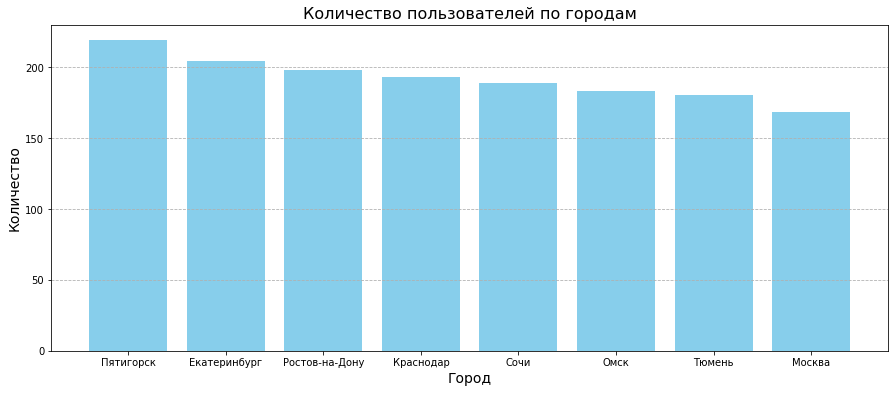

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [12]:
city_counts = users_data['city'].value_counts()

plt.figure(figsize=(15, 6))
bars = plt.bar(city_counts.index, city_counts.values, color='skyblue')
plt.title('Количество пользователей по городам', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.show()
city_counts

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Подписи осей и название нужны для того, чтобы сделать диаграммы и графики понятными и информативными, особенно для заказчика проекта. Без них было бы сложно определить, что именно изображено на графике и какие значения соответствуют каждой оси, так как заказчик не обязан разбираться в коде. Более того, подписи осей помогают установить контекст и понять, какие переменные представлены на графике. По этому при дальнейшем комментировании результатов анализа и визуализации, становятся понятны сделанные из анализа выводы. <br>Метки на оси Х сливаются, надо или увеличить диаграмму, или развернуть метки.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Визуализация данных графиками и диаграммами подразумевает подписи всех осей и название графика  на русском языке, при необходимости наличие меток. Это относится ко всем графикам/диаграммам проекта и является критической ошибкой.</font>
<br><font color='Red'>🛠 По категорийным данным гистограммы не строятся, следует визуализировать столбчатой диаграммой.</font>

<div class='alert alert-info'>Диаграмму исправил, количество пользователей по городам добавил.</div>

В целом равномерно

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Необходимо вывести числовые значения количества пользователей по городам.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Можно вывести значения количества пользователей в городах прямо на диаграмме, примерно вот так:</font>

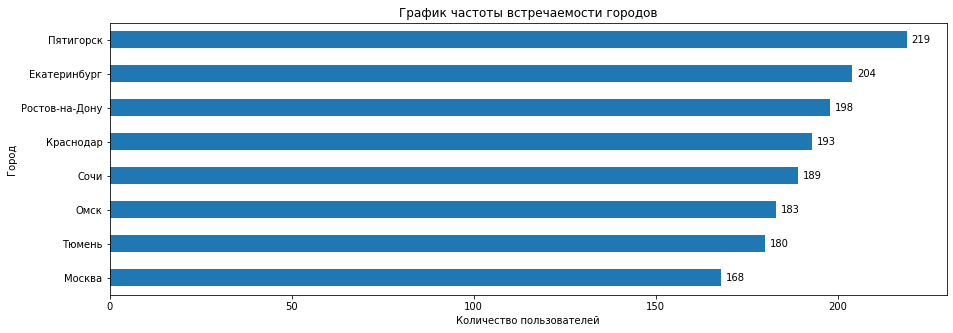

In [13]:
# Комментарий ревьюера 2
import matplotlib.pyplot as plt
import pandas as pd

# Создаем копию датасета, что бы не работать с исходным
tmp = users_data.copy()

# Построение горизонтальной диаграммы
ax = tmp['city'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(15, 5),
    title='График частоты встречаемости городов'
)

# Добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Добавление меток осей
plt.xlabel('Количество пользователей')
plt.ylabel('Город')

# Отображение графика
plt.show()

__Сравнение по типу подписок__

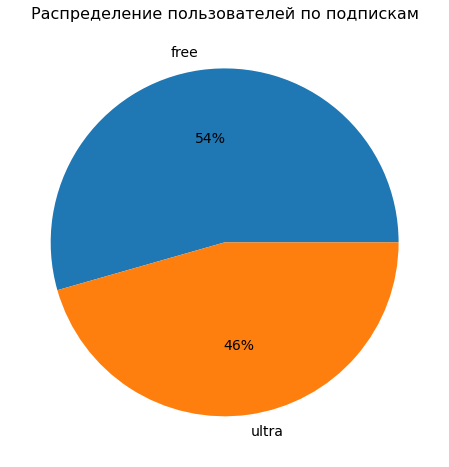

free     835
ultra    699
Name: subscription_type, dtype: int64

In [14]:
subscription_types = users_data['subscription_type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(subscription_types, labels=subscription_types.index, textprops={'fontsize':14}, autopct = "%.0f%%")
plt.title('Распределение пользователей по подпискам', fontsize=16)
plt.show()
subscription_types



<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font>
<br><font color='DarkMagenta'>👉 Доли можно вывести не посредственно на круговой диаграмме параметром `autopct = "%.0f%%"`.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен  необходимым образом.</font>

Ожидаемо бесплатных больше. Но не сильно.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Тут аналогичная ошибка. Следует визуализировать круговой диаграммой.</font><br>
<font color='Red'>🛠 Анализ соотношения пользователей подразумевает определение долей пользователей с подпиской и без.</font>

<div class='alert alert-info'>Диаграмму исправил, количество пользователей по подпискам добавил.</div>

__Анализ возраста пользователей__

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Правильно было бы посмотреть сводную статистику  методом `describe()`.</font>

<div class='alert alert-info'>Добавил метод descibe(). Теперь увидел нарушения по возрасту.</div>

In [15]:
users_data['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

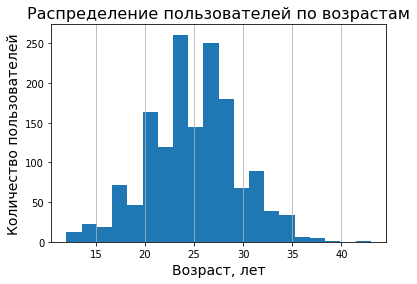

In [16]:
users_data['age'].hist(bins=20)
plt.title('Распределение пользователей по возрастам', fontsize=16)
plt.xlabel('Возраст, лет', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Показать график
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен  необходимым образом.</font>

Распределение похоже на нормальное, если применить медиану для сглаживания - большая часть около 25 лет. Вчерашние студенты.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Следовало отметить, что среди пользователей некоторым менее 18 лет, именно с этого возраста разрешен прокат самокатов. В некоторых компаниях и регионах разрешено с 14 лет, но при письменном согласии родителей. В датасете минимальный возраст 12 лет, это явное нарушение существующих норм.</font>

__Анализ проезжаемых расстояний__

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Правильно было бы посмотреть сводную статистику расстояний поездок  методом `describe()`.</font>

<div class='alert alert-info'>Добавил описание методом describe().</div>

In [17]:
rides_data['distance'].describe()

count    18068.000000
mean      3071.159841
std       1116.831548
min          1.000000
25%       2543.750000
50%       3134.000000
75%       3777.000000
max       7212.000000
Name: distance, dtype: float64

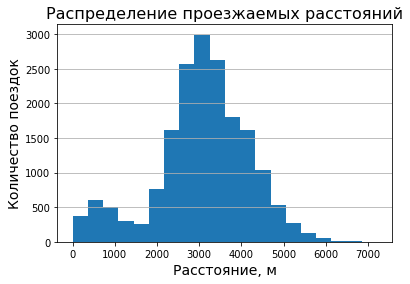

In [18]:
# Гистограмма distance (исправлено оформление) 
rides_data['distance'].hist(bins=20)
plt.title('Распределение проезжаемых расстояний', fontsize=16)
plt.xlabel('Расстояние, м', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Показать график
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен  необходимым образом.</font>

<div class='alert alert-info'>Добавил описание, исправил тип.</div>

Большинство поездок в районе 3 км - черта города - замена городского транспорта.
Небольшой всплеск в области около километра - "попробовать прокатиться"

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что обращено внимание на короткие поездки и дальние поездки.</font>

__Анализ длительности поездок__

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Правильно было бы посмотреть сводную статистику продолжительности поездок  методом `describe()`.</font>

<div class='alert alert-info'>Исправленный вариант</div>

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


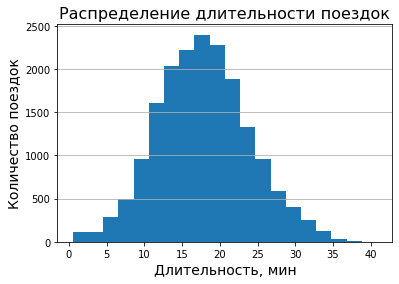

In [19]:
# durations
print(rides_data['duration'].describe())

rides_data['duration'].hist(bins=20)

plt.title('Распределение длительности поездок', fontsize=16)
plt.xlabel('Длительность, мин', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен  необходимым образом.</font>

Распределение похоже на нормальное, среднее значение (выбросов не наблюдается) 17,8 минуты, при медианном значении расстояния 3 км получаем среднюю скорость движения 10 км/ч - в условиях городского движения нормально.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 В выводах не отмечена аномалия с поездками длительностью менее 1 минуты.
<br>
Не смотря на такую низкую продолжительность поездки, эти данные удалять не рекомендуется, так как в дальнейшем производится расчет выручки, которая определяет финансовый результат Сервиса аранды самокатов. Например, пользователь без подписки оплачивает фиксированную сумму только за старт поездки. Более того, в таблице видно, что эти аномально низкие поездки имеют достаточное расстояние поездки, которое то же будет анализироваться далее. А вот данный факт аномальных значений следует отметить в итоговом выводе для дальнейшей диагностики средств контроля времени поездки.</font>
<br><font color='DarkMagenta'>👉 При удалении данных надо всегда иметь ввиду, что удаляются полностью строки датасета, которые содержат другие данные значимые для последующего анализа.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Раздел исследовательского анализа данных должен заканчиваться обобщающим выводом.</font>

<div class='alert alert-info'>Добавил выводы</div>

По результатам анализа данных можно сделать следующие выводы:
- Максимальное количество пользоватеей сервиса в Пятигорске, минимальное - в Москве. (Возможно сервис основан в П., а в М. - наибольшая конкуренция) 
- Пользователей без подписки примерно на 15 % больше чем пользователей с подпиской
- Среди пользователей сервиса имеются лица младше допустимого возраста
- Максимальное количество поездок осуществляется на расстояние от 2,5 до 3,5 км
- Наиболе часты поездки длительностью 15 - 20 мин

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>

### Шаг 4. Объединение данных

In [20]:
# Методом merge объединяем данные по пользователям и поездкам через id пользователя
common = users_data.merge(rides_data, on='user_id')
common = common.merge(subscriptions_data, on='subscription_type')
common.info()
common.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   year               18068 non-null  int64         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,755.0,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,26.265803,2021-08-28,8,2021,6,0,199


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделали объединение датасетов, написали выводы.</font>

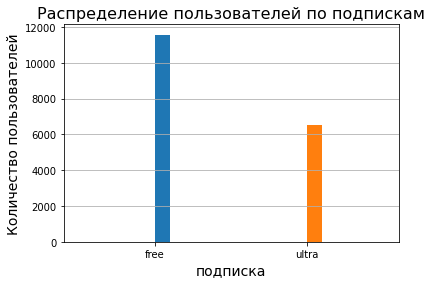

      user_id   name  age  city subscription_type  distance   duration  \
6500      700  Айдар   22  Омск              free    2516.0  14.944286   
6501      700  Айдар   22  Омск              free     847.0  16.234663   
6502      700  Айдар   22  Омск              free    4005.0  20.016628   
6503      700  Айдар   22  Омск              free    1206.0   9.782872   
6504      700  Айдар   22  Омск              free    3048.0  17.427673   

           date  month  year  minute_price  start_ride_price  subscription_fee  
6500 2021-01-02      1  2021             8                50                 0  
6501 2021-02-01      2  2021             8                50                 0  
6502 2021-02-04      2  2021             8                50                 0  
6503 2021-02-10      2  2021             8                50                 0  
6504 2021-02-14      2  2021             8                50                 0  
------------
   user_id  name  age    city subscription_type  distanc

In [21]:
# разбиение на таблицы по типу подписки
users_free = common[common['subscription_type'] == 'free']
users_ultra = common[common['subscription_type'] == 'ultra']
users_free['subscription_type'].hist()
users_ultra['subscription_type'].hist()
plt.title('Распределение пользователей по подпискам', fontsize=16)
plt.xlabel('подписка', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
print(users_free.head())
print('------------')
print(users_ultra.head())

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен  необходимым образом.</font>

Да, бесплатных больше.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 После создания двух новых датасетов следовало вывести по несколько строк каждого.</font>

<div class='alert alert-info'>Исправил диаграмму, добавил вывод</div>

__Анализ параметров по типу подписки__

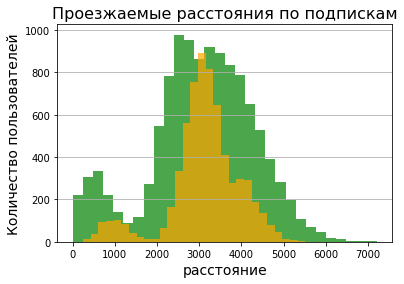

In [22]:
# Сравнение расстояний по подпискам
users_free['distance'].hist(bins=30, alpha=0.7, color='green', label='Free')
users_ultra['distance'].hist(bins=30, alpha=0.7, color='orange', label='Ultra')
plt.title('Проезжаемые расстояния по подпискам', fontsize=16)
plt.xlabel('расстояние', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен  необходимым образом.</font><br>
<font color='DarkGreen'>👌 Хорошо, что гистограммы построены на одной координатной сетке.</font>

<div class='alert alert-info'>Исправил диаграмму</div>

Пользователей с платной подпиской меньше. Разброс с бесплатной подпиской ожидаемо меньше. Но характер зависимости очень близок, что может говорить о корректности данных.

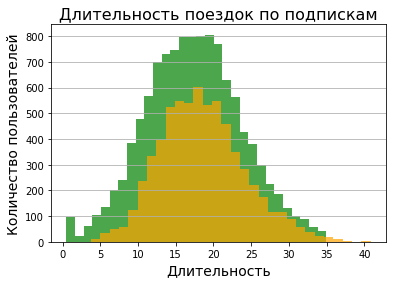

In [23]:
# Сравнение длительности по подпискам
users_free['duration'].hist(bins=30, alpha=0.7, color='green', label='Free')
users_ultra['duration'].hist(bins=30, alpha=0.7, color='orange', label='Ultra')
plt.title('Длительность поездок по подпискам', fontsize=16)
plt.xlabel('Длительность', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен  необходимым образом.</font>

<div class='alert alert-info'>Исправил диаграмму</div>

Картина аналогичная предыдущей: картина для пользователей с платной подпиской уже, но общий характер схож.

#### Шаг 5. Подсчёт выручки

In [24]:
# Округлили минуты "вверх"

common['duration'] = np.ceil(common['duration'])
common.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,755.0,7.0,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,27.0,2021-08-28,8,2021,6,0,199
5,1,Кира,22,Тюмень,ultra,2771.0,17.0,2021-10-09,10,2021,6,0,199
6,1,Кира,22,Тюмень,ultra,3040.0,15.0,2021-10-19,10,2021,6,0,199
7,1,Кира,22,Тюмень,ultra,2843.0,24.0,2021-11-06,11,2021,6,0,199
8,1,Кира,22,Тюмень,ultra,3413.0,16.0,2021-11-14,11,2021,6,0,199
9,1,Кира,22,Тюмень,ultra,749.0,16.0,2021-11-22,11,2021,6,0,199


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделано округление продолжительности поездки.</font>

__Группируем данные по пользователям__

In [25]:
# Функция для вычисления суммарной выручки

def monthly_cost(row):
    if row['subscription_type'] == 'free':
        return 50 * row['rides_count'] + row['total_duration'] * row['minute_price']
    else:  # Для ultra
        return row['total_duration'] * row['minute_price'] + row['subscription_fee']

In [26]:
users_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
 9   year               11568 non-null  int64         
 10  minute_price       11568 non-null  int64         
 11  start_ride_price   11568 non-null  int64         
 12  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memo

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='Red'>🛠 Ошибка кода. К сожалению, я не могу продолжить ревью. 😢</font>
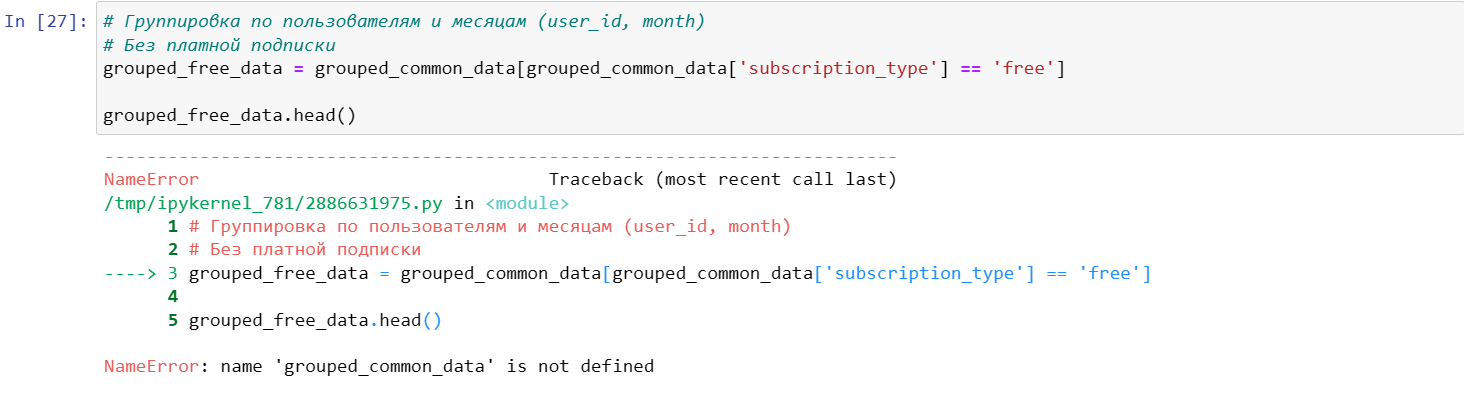

<div class='alert alert-info'>Переделал агрегирование</div>

In [27]:
grouped_common_data = common.groupby(['user_id', 'month']).agg(
    total_distance=('distance', 'sum'),  # Суммарное расстояние
    total_duration=('duration', 'sum'),  # Суммарное время
    rides_count=('distance', 'size')     # Количество поездок
).reset_index()

grouped_common_data = grouped_common_data.merge(
    common[['user_id', 'subscription_type', 'minute_price', 'subscription_fee']].drop_duplicates(),
    on='user_id',
    how='left'
)




In [28]:
# Дубликаты

common.duplicated().sum()

0

In [29]:
users_data.duplicated().sum()

0

<div class='alert alert-info'>Удалил дубликаты выше</div>

In [30]:
# Применение функции для расчёта month_cost
grouped_common_data['month_cost'] = grouped_common_data.apply(monthly_cost, axis=1)
print(grouped_common_data['rides_count'].describe())
print('---------------------')
print(grouped_common_data.tail())

count    11331.000000
mean         1.594564
std          0.831604
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: rides_count, dtype: float64
---------------------
       user_id  month  total_distance  total_duration  rides_count  \
11326     1534      6          3411.0            26.0            2   
11327     1534      8          7623.0            48.0            2   
11328     1534      9          4929.0            23.0            1   
11329     1534     11         13353.0            78.0            4   
11330     1534     12          2372.0            16.0            1   

      subscription_type  minute_price  subscription_fee  month_cost  
11326              free             8                 0       308.0  
11327              free             8                 0       484.0  
11328              free             8                 0       234.0  
11329              free             8                 0       824.0

In [31]:
# Группировка по пользователям и месяцам (user_id, month)
# С подпиской ultra
grouped_ultra_data = grouped_common_data[grouped_common_data['subscription_type'] == 'ultra']
grouped_ultra_data.head()

,user_id,month,total_distance,total_duration,rides_count,subscription_type,minute_price,subscription_fee,month_cost
0,1,1,7028.0,42.0,2,ultra,6,199,451.0
1,1,4,755.0,7.0,1,ultra,6,199,241.0
2,1,8,6724.0,46.0,2,ultra,6,199,475.0
3,1,10,5811.0,32.0,2,ultra,6,199,391.0
4,1,11,7005.0,56.0,3,ultra,6,199,535.0


In [32]:
# Группировка по пользователям и месяцам (user_id, month)
# Без платной подписки
grouped_free_data = grouped_common_data[grouped_common_data['subscription_type'] == 'free']
grouped_free_data.head()

,user_id,month,total_distance,total_duration,rides_count,subscription_type,minute_price,subscription_fee,month_cost
4533,700,1,2516.0,15.0,1,free,8,0,170.0
4534,700,2,13449.0,89.0,5,free,8,0,962.0
4535,700,3,3799.0,19.0,1,free,8,0,202.0
4536,700,4,2985.0,16.0,1,free,8,0,178.0
4537,700,6,5929.0,29.0,2,free,8,0,332.0


In [33]:
monthly_revenue = grouped_common_data.groupby(['subscription_type', 'month'])['month_cost'].sum().reset_index()
print(monthly_revenue[::5])
sum_free = monthly_revenue[monthly_revenue['subscription_type'] == 'free'].sum()
sum_ultra = monthly_revenue[monthly_revenue['subscription_type'] == 'ultra'].sum()
print(sum_free + sum_ultra)

   subscription_type  month  month_cost
0               free      1    193850.0
5               free      6    192144.0
10              free     11    179076.0
15             ultra      4    137318.0
20             ultra      9    129337.0
subscription_type    freefreefreefreefreefreefreefreefreefreefreefr...
month                                                              156
month_cost                                                   3878641.0
dtype: object


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Вот, что написано в задании: <br><b>5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.</b> <br>Датафрейм должен создаваться агрегацией датасета созданного в шаге 4, а потом в нем создается колонка с выручкой.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Ошибка кода. К сожалению, я не могу продолжить ревью. 😢</font>
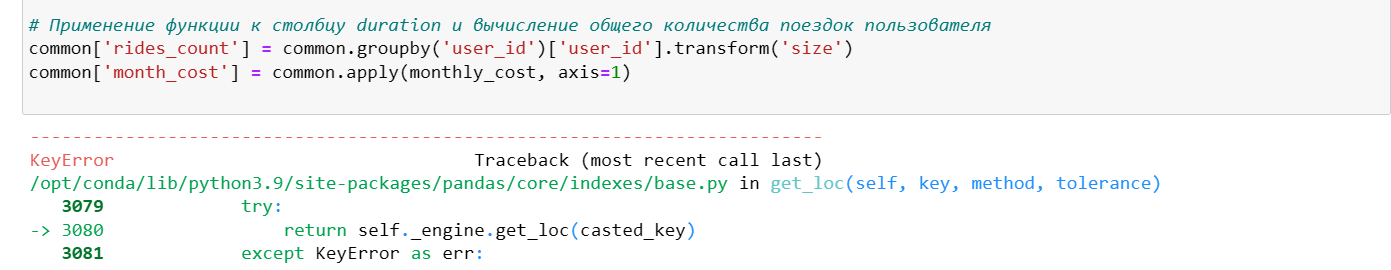

<div class='alert alert-info'>Исправил ошибку. Переделал функцию, переписал агрегацию.</div>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Согласно заданию брифа должен быть создан ОДИН агрегированный датафрейм, а уже из него фильтруются данные по подписке при дальнейшем анализе. И он ранее создан под именем `common`.</font>

Данные подготовлены. Приступаем к проверке гипотез.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Неправильно сделан расчет выручки.</font>

In [34]:
# Комментарий ревьюера 2
# Контроль суммы выручки
tmp1, tmp2, col_rev = grouped_free_data.copy(), grouped_ultra_data.copy(), 'month_cost'
print("Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице:", tmp1[col_rev].sum() + tmp2[col_rev].sum())

Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице: 3878641.0


In [35]:
# Комментарий ревьюера 3
# Контроль суммы выручки
tmp, col_rev = grouped_common_data.copy(), 'month_cost'
print("Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице:", tmp[col_rev].sum())

Правильное значение суммы выручки 3878641, сумма выручки расчитанная в таблице: 3878641.0


<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Неправильно сделан расчет выручки.<br>Так неправильно создан датафрейм с агрегированными данными, в нем должны быть просуммированы поездки каждого пользователя по месяцам, а тут расчет делается по каждой поездке (см. код ниже). В итоге, абоненсткая плата считается по каждой поездке, а не за месяц. </font>
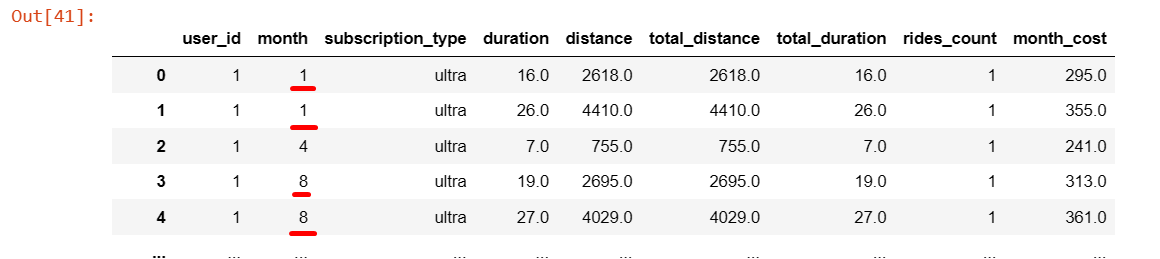
<br><font color='Red'>🛠 Вот так должна выглядеть арегированная таблица с выручкой:</font>
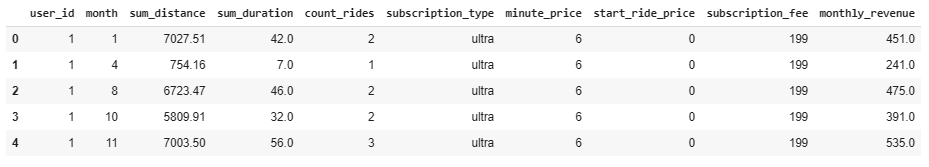

<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена, выручка посчитана не правильно. <br>Необходимым навыком специалиста нашей отрасли является умение находить собственные ошибки. В реальном проекте не будет, ни преподавателя, ни ревьюера. А сдавать заказчику проект с ошибкой чревато неприятными последствиями.<br>Пойдем искать не свои ошибки.<br>Расчет показывает, что в проекте выручка больше, чем должно быть. Воможно, что в датасете лишние строки, проверим дубликаты:<br>
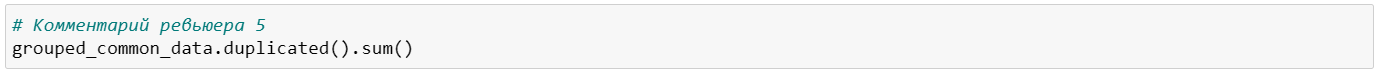
<br>В таблице с выручкой их нет. Посмотрим дубликаты в таблице, из которой делали агрегированную:
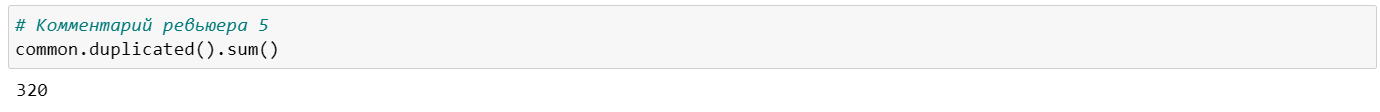
<br>О! 320 штук дубликатов. Пошли искать откуда они могли взяться. Был у нас датасет с пользователями, проверим его:
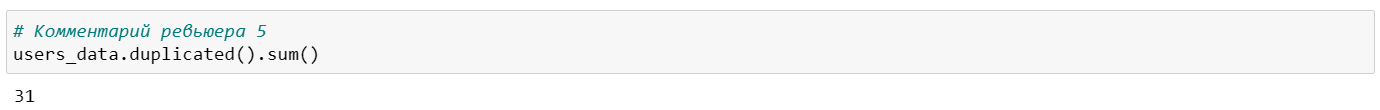
<br>А вот и левые пользователи. Но в предобработке их, вроде, удаляли, посмотрим тот код:
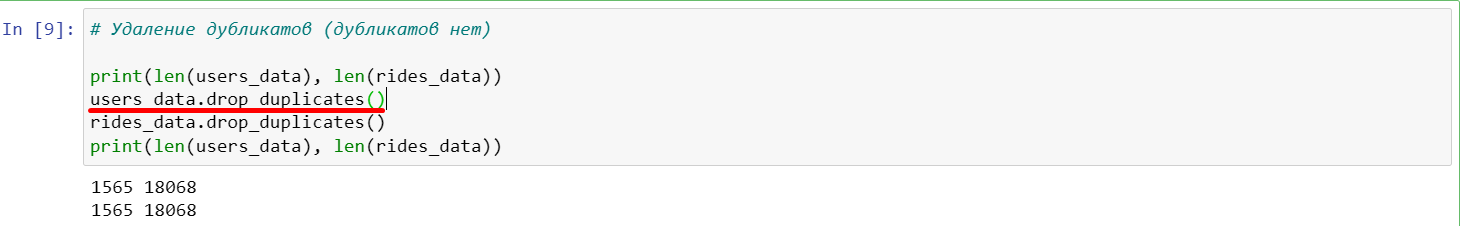
<br>Ай-я-яй. А эти дубликаты не удалили, так как нет параметра `(inplace= True)`. 😱</font>

<div class='alert alert-info'>Выручку поправил</div>

<font color='DarkBlue'><b>Комментарий ревьюера 6</b></font><br>
<font color='DarkGreen'>👌 Выручку победили.</font>

### Шаг 6. Проверка гипотез

μ

##### Гипотеза 1
<b>Гипотеза H<sub>0</sub></b>: Среднее время поездки пользователей с подпиской меньше или равно среднему времени поездки пользователей без подписки.

<b>Гипотеза H<sub>1</sub></b> (альтернативная): Среднее время поездки пользователей с подпиской больше, чем среднее время поездки пользователей без подписки. 

<font color='DarkBlue'><b>Комментарий ревьюера 6</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Не правильно сформулированы гипотезы.</font>
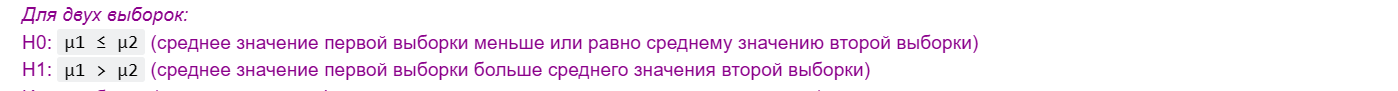

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Неправильно сформулирована нулевая гипотеза, не сформулирована альтернативная гипотеза. </font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Неправильно сформулирована нулевая гипотеза, не сформулирована альтернативная гипотеза. Формулировка гипотез должна быть в ячейке Markdown, а не в ячейке кода. Проект должен иметь структуру отделяющую код от комментариев, что делаем и результатов преобразования. В ячейке кода размещаются только комментарии относящиеся непосредственно к коду: описание переменных, подаваемые параметры в функцию, описание возвращаемого значения из функции и т.п. Это ошибка во всем разделе.</font>
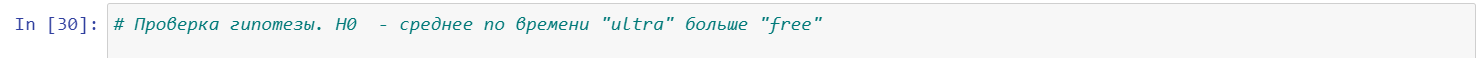

In [36]:
# Проверка
# Времена поездок по типу подписки

duration_free = common[common['subscription_type'] == 'free']['duration']
duration_ultra = common[common['subscription_type'] == 'ultra']['duration']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(duration_ultra, duration_free, alternative='greater')
print(f'Значение p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Значение p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера 6</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно.</font>

Вывод: пользователи с подпиской имеют в среднем большее время поездки чем пользователи без подписки.

<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='Red'>🛠 Не правильно проводится тестирование. Тестироваться должны выборки с длительность каждой поездки пользователя, а не суммарная за месяц. И почему результат теста равный 1 не смущает?</font>

In [37]:
# Комментарий ревьюера 5
grouped_ultra_data

,user_id,month,total_distance,total_duration,rides_count,subscription_type,minute_price,subscription_fee,month_cost
0,1,1,7028.0,42.0,2,ultra,6,199,451.0
1,1,4,755.0,7.0,1,ultra,6,199,241.0
2,1,8,6724.0,46.0,2,ultra,6,199,475.0
3,1,10,5811.0,32.0,2,ultra,6,199,391.0
4,1,11,7005.0,56.0,3,ultra,6,199,535.0
...,...,...,...,...,...,...,...,...,...
4528,699,6,4073.0,17.0,1,ultra,6,199,301.0
4529,699,8,7020.0,45.0,2,ultra,6,199,469.0
4530,699,9,6366.0,31.0,2,ultra,6,199,385.0
4531,699,10,4708.0,16.0,1,ultra,6,199,295.0


Гипотеза  H<sub>0</sub> подтвердилась: пользователи с подпиской имеют большее среднее время поездок.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Необходимо вывести значение results.pvalue.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Не корректно сформулирован вывод теста гипотезы. Нулевую отвергаем, а альтернативной нет.</font>

<div class='alert alert-info'>Переделал гипотезы, вывод.</div>

##### Гипотеза 2
<b>Гипотеза H<sub>0</sub></b>: Пользователи с подпиской  в среднем проезжают не более 3130 м - что является оптимальным для износа самокатов.

<b>Гипотеза H<sub>1</sub></b> (альтернативная): Пользователи с подпиской проезжают <i>больше</i> 3130 м.

<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='DarkMagenta'>👉 Не совсем корректно сформулированы гипотезы, я же специально давал доп.материал по гипотезам. 😢</font>
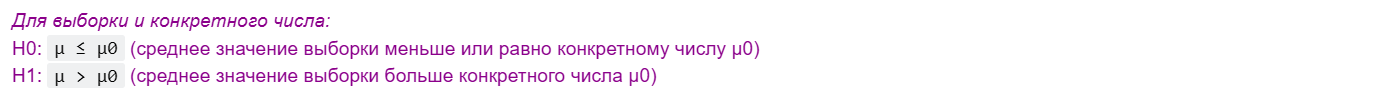

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Неправильно сформулирована альтернативная гипотеза.</font>

<div class='alert alert-info'>Исправил формулировку альтернативной гипотезы.</div>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Необходимо сформулировать нулевую и альтернативную гипотезы.</font>

In [38]:
avg_distance_free = common[common['subscription_type'] == 'free']['distance']
avg_distance_ultra = common[common['subscription_type'] == 'ultra']['distance']
print(avg_distance_free.describe(), avg_distance_ultra.describe(), sep='\n===============\n')

count    11568.000000
mean      3045.992911
std       1246.174341
min          1.000000
25%       2367.000000
50%       3115.000000
75%       3906.000000
max       7212.000000
Name: distance, dtype: float64
count    6500.000000
mean     3115.949231
std       836.894838
min       245.000000
25%      2786.000000
50%      3149.000000
75%      3561.000000
max      5700.000000
Name: distance, dtype: float64


In [39]:
# Проверка
optimal_distance = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    avg_distance_ultra, 
    optimal_distance,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9120422337080507
Не отвергаем нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Не корректно проводится тестирование, не правильное значение `alternative`. </font>

<div class='alert alert-info'>Исправил аlternative.</div>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Не корректно проводится тестирование, тестироваться должна выборка, а не ее среднее значение. Т-тест сам определит среднее выборки.</font>

<div class='alert alert-info'>Исправил</div>

Пользователи с подпиской в среднем проезжают не более допустимого для оптимальной эксплуатации самокатов.

##### Гипотеза 3
<b>Гипотеза H<sub>0</sub></b>: Помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.

<b>Гипотеза H<sub>1</sub></b> (альтернативная): Помесячная выручка от пользователей с подпиской больше выручки от пользователей без подписки.


<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Неправильно сформулированы нулевая и альтернативная гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Необходимо сформулировать нулевую и альтернативную гипотезы.</font>

In [40]:
# гипотеза Н0: Помесячная выручка от пользователей с подпиской больше

# ultra
total_cost_ultra = grouped_ultra_data['month_cost'].sum()

# free
total_cost_free = grouped_free_data['month_cost'].sum()

print(f'Суммарная выручка от пользователей ultra {total_cost_ultra.round(2)}, от пользователей free {total_cost_free.round(2)}')

Суммарная выручка от пользователей ultra 1644537.0, от пользователей free 2234104.0


In [41]:

alpha = 0.05 # уровень статистической значимости

ultra_revenue = grouped_ultra_data['month_cost']
free_revenue = grouped_free_data['month_cost']

results = st.ttest_ind(ultra_revenue, free_revenue, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза подтвердилась')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Необходимо вывести значение results.pvalue.</font><br>
<font color='Red'>🛠 Не правильно проводится тестирование, тестироваться должны выборки по месячной выручке каждого пользователя, а не суммарная выручка всех пользователей.</font>

Получается, что выручка от поьзователей c подпиской больше.

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Не корректно сформулирован вывод теста гипотезы.</font>

<div class='alert alert-info'>Исправил</div>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Принцип формулирования нулевой (H0) и альтернативной (H1) гипотез при t-тесте средних двух выборок и выборки и конкретного числа, для двухсторонней и односторонней гипотез:<br>

<b>Двухсторонняя гипотеза</b><br>
Нулевая гипотеза (H0): Предполагает, что средние значения сравниваемых выборок равны (нет значимой разницы) или, что среднее значение выборки равно конкретному числу.<br>
Альтернативная гипотеза (H1): Предполагает, что средние значения сравниваемых выборок не равны (существует значимая разница) или, что среднее значение выборки отличается от конкретного числа.<br>
<i>Для двух выборок:</i><br>
 H0: `μ1 = μ2` (средние значения двух выборок равны)<br>
 H1: `μ1 ≠ μ2` (средние значения двух выборок не равны)<br>

<i>Для выборки и конкретного числа:</i><br>
H0: `μ = μ0` (среднее значение выборки равно конкретному числу μ0)<br>
H1: `μ ≠ μ0` (среднее значение выборки отличается от конкретного числа μ0)<br>

<b>Односторонняя гипотеза</b><br>
Нулевая гипотеза (H0): Предполагает, что среднее значение первой выборки (или среднее значение выборки) меньше или равно среднему значению второй выборки (или конкретному числу).<br>
Альтернативная гипотеза (H1): Предполагает, что среднее значение первой выборки (или среднее значение выборки) больше среднего значения второй выборки (или конкретного числа).<br>

<i>Для двух выборок:</i><br>
H0: `μ1 ≤ μ2` (среднее значение первой выборки меньше или равно среднему значению второй выборки)<br>
H1: `μ1 > μ2` (среднее значение первой выборки больше среднего значения второй выборки)<br>
Или наоборот (в зависимости от формулировки аналитической задачи, задания проекта):<br>
H0: `μ1 ≥ μ2` (среднее значение первой выборки не меньше, чем среднее значение второй выборки.) <br>
H1: `μ1 < μ2` (среднее значение первой выборки меньше среднего значения второй выборки)<br>

<i>Для выборки и конкретного числа:</i><br>
H0: `μ ≤ μ0` (среднее значение выборки меньше или равно конкретному числу μ0)<br>
H1: `μ > μ0` (среднее значение выборки больше конкретного числа μ0)<br>
Или наоборот (в зависимости от формулировки аналитической задачи, задания проекта):<br>
H0: `μ ≥ μ0` (среднее значение выборки больше или равно конкретному числу μ0)<br>
H1: `μ < μ0` (среднее значение выборки меньше конкретного числа μ0)<br>

Необходимо иметь в виду, что при тестировании параметр «alternative» относится к первой выборке в перечне параметров t-теста.
</font>

##### Гипотеза 4
Гипотеза об уменьшении заявок отпользователей после обновления серверов


In [42]:
# Понадобится проверка гипотезе о двух средних одного набора - до и после проведённых изменений

# alpha = 0.05  # уровень статистической значимости

# results = st.ttest_rel(tickets_before, tickets_after, alternative='less')


# print('p-значение:', results.pvalue)

# if results.pvalue < alpha:
#     print('Отвергаем нулевую гипотезу')
# else:
#     print('Не получилось отвергнуть нулевую гипотезу')

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Не правильно указан параметр `aternative`, так как данный параметр имеет по умолчанию значение `'two-sided'`.</font>

<div class='alert alert-info'>Исправил</div>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Это односторонняя или двусторонняя гипотеза?</font>

#### Шаг 7. Распределения

In [43]:
# Что-то я сильно отстаю... хотя задание интересное.. по возможности постараюсь сделать..

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Жалко, что не стали делать необязательные задания.</font>

### Выводы
В ходе работы были обработаны данные, произведено объединение таблиц, проверка входных данных. Пропусков и некачественных данных не обнаружено.
Анализ данных показал:
- Сервис используется по различным городам в целом равномерно;
- количество пользователей без подписки превосходит количество пользователей с подпиской, но не кратно;
- Средний возраст пользователей 25 лет;
- среднее проезжаемое расстояние порядка 3 км;
- среднее время пользования 17 мин;
По типу подписки видны следующие особенности:
- длительность поездок у пользователей без подписки выше чем у пользователей с подпиской, а проезжаемое расстояние в осовном совпадает;
Подсчитана средняя выручка по типу подписки, что использовалось при проверке гипотез.

###### Проверка гипотез

Гипотеза 1: Пользователи с подпиской тратят на поездки больше времени

Гипотеза подтвердилась. Пользователи с платной подпиской имеют в среднем более долгие поездки.

Гиптеза 2:Пользователи с подпиской в среднем проезжают менее 3130 м - что является оптимальным для износа самокатов

Гипотеза подтвердилась, использование самокатов пользователями с подпиской укладывается в оптимальное для эксплуатации самокатов.

Гипотеза 3 Помесячная выручка от пользователей с подпиской выше чем от пользователей без подписки

Гипотеза подтвердилась, доход от пользователей с подпиской выше чем от пользователей с без подписки.

На основании проверенных гипотез можно сделать вывод, что введение подписки приводит к увеличению доходов и не вызывает повышенный износ парка самокатов.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Общий вывод исследования должен обобщать весь проект, включая анализ и предобработку данных, и кратко суммировать промежуточные выводы разделов всего исследования.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Евгений!<br></font>
<font color='Red'>🛠 Увы, должен прервать ревью из-за ошибки в коде. Настоятельно рекомендую перед отправкой проекта на ревью проверять в JupyterHub исполнение кода тетрадки (см.скрин ниже).<br>
Необходимо исправить ошибки, в том числе уже обнаруженные:<br>
Проверить пропуски во всех датасетах. Проверить и удалить дубликаты в датасетах. Сделать выводы по разделу предобработки данных. Графики и диаграммы необходимо оформить подписями осей и названием графика/диаграммы на русском языке. Переделать визуализацию частоты встречаемости городов. Необходимо вывести числовые количества пользователей в городах. Рассчитать доли пользователей с подпиской и без. Правильно визуализировать анализ пользователей с подпиской и без. Написать выводы по разделу исследовательского анализа данных. Создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4.<br>
Жду исправленный проект. Если будут трудности, можно обратиться к куратору. </font>
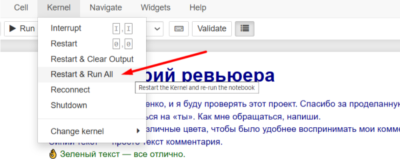

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Евгений, проект очень хорошо и детально проработан. И дальше так держать!<br></font>
<font color='Red'>🛠 Что бы еще лучше сделать проект надо:</font><br>
<font color='Red'>🛠 Создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Исправить формулирование гипотез по продолжительности поездок пользователями с подпиской. Переделать проект в соответствии с требованиями к оформлению проекта. При проверке гипотез необходимо выводить значение results.pvalue. Сформулировать гипотезы по среднему расстоянию проезжающему пользователями с подпиской. Переделать задание по тестированию гипотез по среднему расстоянию проезжающему пользователями с подпиской. Сформулировать гипотезы по выручке с подпиской и без. Переделать задание по тестированию гипотез по выручке пользователей с подпиской. Переделать задание по обращениям в техподдержку. <br></font>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Удачи. </font>

<div class='alert alert-info'>Исправил вроде бы всё что понял. К 7-му заданию если вольюсь в режим и подтяну все хвосты обязательно вернусь.</div>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 3</b></font><br><br>
<font color='DarkGreen'>👌 Евгений, увы, остались еще ошибки.<br></font>
<font color='Red'>🛠 Что нужно доделать:</font><br>
<font color='Red'>🛠 Правильно создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Переделать расчет выручки. Исправить формулирование гипотез по продолжительности поездок пользователями с подпиской. Написать корректный вывод тестирования гипотез длительности поездок пользователей с подпиской и без. Переделать формулирование гипотез по среднему расстоянию проезжающему пользователями с подпиской. Переделать задание по тестированию гипотез по среднему расстоянию проезжающему пользователями с подпиской. Исправить формулирование гипотез по выручке. Корректно сформулировать вывод теста гипотезы по выручке.<br>Надо будет проверить выводы,  при необходимости  откорректировать.</font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

    С выручкой так и не получается. Поездки учтены, данные с примером на картинке совпали, но сумма немного не сходится. Где просчёт - не пойму.

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 4 (4-тое ревью из 6-ти возможных)</b></font><br>
<font color='DarkGreen'>👌 Евгений!<br></font>
<font color='Red'>🛠 Опять должен прервать ревью из-за ошибки в коде. Очень настоятельно рекомендую перед отправкой проекта на ревью проверять в JupyterHub исполнение кода тетрадки (см.скрин выше).<br>
Жду исправленный проект.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 5 (5-тое ревью из 6-ти возможных)</b></font><br><br>
<font color='DarkGreen'>👌 Евгений, остались ошибки.<br></font>
<font color='Red'>🛠 Что нужно сделать:</font><br>
<font color='Red'>🛠 Переделать расчет выручки. Исправить формулирование гипотез по продолжительности поездок пользователями с подпиской. Переделать задание по тестированию гипотез по продолжительности поездок пользователям с подпиской.<br>Надо будет проверить выводы,  при необходимости  откорректировать.</font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 6</b></font><br><br>
<font color='DarkGreen'>👌 Евгений! Удалось справиться со всеми заданиями в проекте. Молодец! 😄 Спасибо за работу!<br>
Входе выполнения проекта научились анализировать первичные данные, проводить обработку датасета, объединять таблицы. Провели самостоятельный исследовательский и статистический анализ. </font><br>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
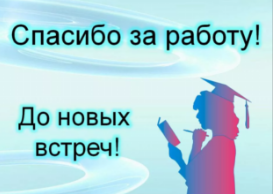